### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

(118, 2) (118,)


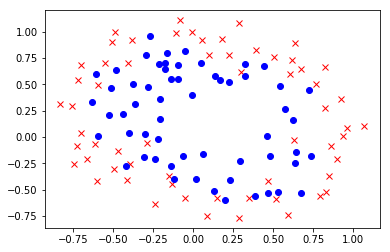

In [2]:
# Load dataset
data=np.genfromtxt('q3_data.csv',delimiter=',')
X_in = data[:,0:2]
Y_in = data[:,2]

print(X_in.shape, Y_in.shape)

# Plot points
fig = plt.plot( X_in[Y_in==0, 0],  X_in[Y_in==0, 1], 'rx',  X_in[Y_in ==1, 0],  X_in[Y_in ==1 , 1], 'bo')


## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [3]:
# Transform points to 28D space
def map_feature(X_in):
    X_full = np.append( np.ones((X_in.shape[0],1)), X_in, axis=1);
    for i in range(2,7):
        for j in range(i+1):
            X_app = np.multiply( np.power(X_in[:,0], j), np.power(X_in[:,1], i-j) ).reshape(1,-1).T
            X_full = np.append(  X_full, X_app , axis = 1 )
            
    return X_full
    
X_full=map_feature(X_in)
print(X_full.shape)

(118, 28)


## P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- the hyper-parameter $\lambda$ is set to 1
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

In [29]:
# Define your functions here
def sigmoid(input_value): 
    return np.divide(1 , ( 1 + np.exp(-input_value) ))

def logistic_regression_regularized(X_full, Y_in, num_steps, learning_rate, lambda0):
    # inputs: N * 2 dimensional array
    # labels: N dimensional array
    # num_steps: Number of steps of gradient descent
    # learning_rate: associated with gradient descent
    weights = np.zeros((1, X_full.shape[1]))
    grad = np.zeros((1, X_full.shape[1]))
    
    for iter in range(num_steps):
        
        grad0 = ( Y_in - sigmoid(weights@ X_full.T) )@ X_full[:,0]
        
        grad_rest = ( Y_in - sigmoid(weights@ X_full.T) )@ X_full[:,1:] - lambda0*weights[0,1:]
        
        grad[0,0]=grad0/(X_full.shape[0])
        grad[0,1:] = grad_rest/(X_full.shape[0])

        weights = weights + learning_rate*grad
    
    return weights 

def predict_fn(X_in, weights):
    
    inputs_fin = map_feature(X_in)
    y_val = sigmoid(weights@ inputs_fin.T)
    y_val[np.where(y_val > 0.5)] = 1
    y_val[np.where(y_val < 0.5)] = 0
    
    return y_val

def plot_DB_acc(X_full, weights, Y_in):

    # Accuracy
    Y_predict = predict_fn(X_full[:,1:3] , weights).T
    print(Y_predict.shape)
    
    count = 0
    for i in range(Y_predict.shape[0]):
        count += int(Y_predict[i,0] == Y_in[i])
    print("Accuracy from self-defined function is %0.5f " %(float(100*count) / Y_predict.shape[0]))

    # Plot decision boundary
    x_r  = np.arange(np.amin(X_full[:, 1]), np.amax(X_full[:, 1]), 0.01)
    y_r  = np.arange(np.amin(X_full[:, 2]), np.amax(X_full[:, 2]), 0.01)
    xv, yv = np.meshgrid(x_r, y_r)
    print(xv.shape, yv.shape)
    Z=np.zeros((xv.shape))

    for c_x, x in enumerate(x_r):
        for c_y, y in enumerate(y_r):
            Z[c_y, c_x] = predict_fn(np.array([[x,y]]), weights)

    print(Z.shape)
    fig = plt.plot( X_in[Y_in==0, 0],  X_in[Y_in==0, 1], 'rx',  X_in[Y_in ==1, 0],  X_in[Y_in ==1 , 1], 'bo')
    plt.contour(x_r, y_r, Z)

(1, 28)
(118, 1)
Accuracy from self-defined function is 82.20339 
(188, 191) (188, 191)
(188, 191)


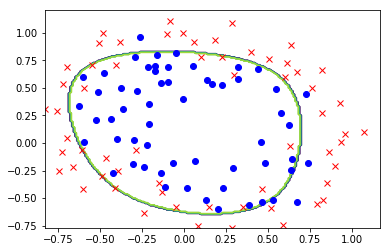

In [30]:
# lambda = 1
num_steps = 100000; learning_rate = 5e-4; lambda0 = 1
weights = logistic_regression_regularized(X_full, Y_in, num_steps, learning_rate, lambda0)
print(weights.shape)

plot_DB_acc(X_full, weights, Y_in)

## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 100]$
- draw the decision boundaries


(118, 1)
Accuracy from self-defined function is 82.20339 
(188, 191) (188, 191)
(188, 191)


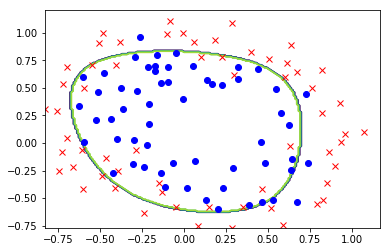

In [20]:
# lambda = 0
num_steps = 100000; learning_rate = 5e-4; lambda1 = 0
weights1 = logistic_regression_regularized(X_full, Y_in, num_steps, learning_rate, lambda1)

plot_DB_acc(X_full, weights1, Y_in)

(118, 1)
Accuracy from self-defined function is 61.86441 
(188, 191) (188, 191)
(188, 191)


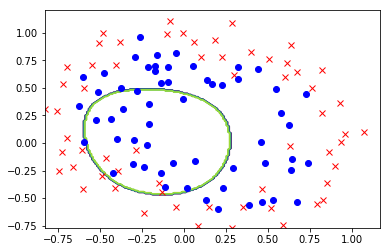

In [31]:
# lambda = 100
num_steps = 100000; learning_rate = 0.00005; lambda2 = 100
weights2 = logistic_regression_regularized(X_full, Y_in, num_steps, learning_rate, lambda2)

plot_DB_acc(X_full, weights2, Y_in)

For lambda = 0, we get a similar result to lambda = 1. This shows that for a low value of lambda, we are not getting any reduction in the overfitting. When we inrcease lambda, we can see that the accuracy drops, and the decision boundaries also shift. Thus the overfitting of the sample data ends up decreasing.